In [1]:
import librosa
import librosa.display
from scipy import signal
from scipy import misc
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import audioread

from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *

In [2]:
manual_df = pd.read_csv("./data/ScreamingPiha_Manual_Labels.csv")
filtered_df = manual_df[manual_df['DURATION'] > 1]
manual_df

FOLDER             IN FILE  CLIP LENGTH  CHANNEL   OFFSET  DURATION  \
0    ./TEST/  ScreamingPiha1.wav      32.6160        0   1.5448    2.1297   
1    ./TEST/  ScreamingPiha1.wav      32.6160        0  10.1638    0.8498   
2    ./TEST/  ScreamingPiha1.wav      32.6160        0   0.5549    0.9999   
3    ./TEST/  ScreamingPiha1.wav      32.6160        0   8.7739    0.8399   
4    ./TEST/  ScreamingPiha1.wav      32.6160        0  12.6335    1.9997   
..       ...                 ...          ...      ...      ...       ...   
249  ./TEST/  ScreamingPiha2.wav      33.9331        0  26.9274    1.7602   
250  ./TEST/  ScreamingPiha2.wav      33.9331        0  30.8178    0.7200   
251  ./TEST/  ScreamingPiha2.wav      33.9331        0  29.8677    0.9401   
252  ./TEST/  ScreamingPiha2.wav      33.9331        0  31.5378    1.9502   
253  ./TEST/  ScreamingPiha2.wav      33.9331        0  33.7880    0.1100   

     SAMPLING RATE MANUAL ID  
0            16000      bird  
1            16000      bird  
2            16000      bird  
3            16000      bird  
4            16000      bird  
..             ...       ...  
249          44100      bird  
250          44100      bird  
251          44100      bird  
252          44100      bird  
253          44100      bird  

[254 rows x 8 columns]

In [7]:
def load_audio(clip_path):
    ''' takes a clip path and returns the audio'''
    y, sr = librosa.load(clip_path, sr=12000)
    return y

In [8]:
def spectrogram(y):
    ''' takes an audio clip, transforms it, and displays
        the spectrogram and the transformed audio clip'''
    S = np.abs(librosa.stft(y))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max), x_axis='time', ax=ax)
    plt.title("Piha audio clip")
    plt.ylabel("Frequency (0-6kHz)")
    return S

In [9]:
def template(path):
    ''' takes an audio clip (transformed), selects a portion to
        create the template, and returns the template'''
    template = np.load(path)
    return template

In [10]:
def correlation(technique, threshold_type, threshold_const, threshold_min, bi_dir, window_size):
    isolation_parameters = {
        "technique" : technique,
        "threshold_type" : threshold_type,
        "threshold_const" : threshold_const,
        "threshold_min" : threshold_min,
        "bi_directional_jump" : bi_dir,
        "window_size" : window_size
        }
    return isolation_parameters

In [11]:
def test(clip_path, S, template, y, params):
    ''' takes the path of the audio clip, the transformed audio
        clip, and the template to perform the cross-correlation
        to display the local_score_visualization, and returns
        the dataframe'''
    SAMPLE_RATE, SIGNAL = audio.load_wav(clip_path)
    if len(SIGNAL.shape) == 2:
        # averaging the two channels together
        SIGNAL = SIGNAL.sum(axis=1) / 2
        
    # downsample the audio if the sample rate > 44.1 kHz
    # Force everything into the human hearing range.

    if SAMPLE_RATE > 44100:
        rate_ratio = 44100 / SAMPLE_RATE
        SIGNAL = scipy_signal.resample(
            SIGNAL, int(len(SIGNAL) * rate_ratio))
        SAMPLE_RATE = 44100

    corr = signal.correlate2d(S,template,boundary='symm',mode='same')
    corr_reduced_max = np.amax(corr,axis=0)
    local_score = corr_reduced_max/max(corr_reduced_max)

    test_df = steinberg_isolate(corr_reduced_max/max(corr_reduced_max),y,12000,"test_dir","test_file",params)
    local_line_graph(local_score, clip_path, SAMPLE_RATE, SIGNAL, automated_df = test_df, premade_annotations_df=pd.DataFrame(), save_fig=True)
    # local_score_visualization(local_score, clip_path, automated_df = test_df)
    return test_df

### Template

In [52]:
piha1 = load_audio('data/test/ScreamingPiha1.wav')
piha1

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -7.6130964e-06,  1.3362171e-05,  3.2501273e-05], dtype=float32)

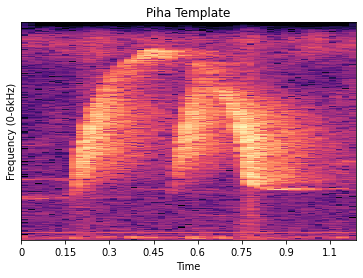

In [53]:
temp = template(piha1)

### Screaming 2

In [54]:
path2 = 'data/test/ScreamingPiha2.wav'
piha2 = load_audio(path2)
piha2

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

array([[1.3257694e+00, 2.4991512e+00, 1.8887196e+00, ..., 1.0712575e-01,
        4.9178953e+00, 4.5990777e+00],
       [6.6982079e-01, 3.1457748e+00, 6.2937026e+00, ..., 3.8763504e+00,
        5.7982445e+00, 2.4185183e+00],
       [5.5235493e-01, 3.1872294e+00, 7.9808388e+00, ..., 3.2215829e+00,
        5.6444893e+00, 3.2969782e+00],
       ...,
       [5.9118793e-05, 1.5429613e-04, 1.7771986e-04, ..., 2.1640344e-04,
        2.2434338e-04, 3.6801473e-04],
       [3.0692368e-05, 1.4198643e-04, 2.0672099e-04, ..., 1.8170406e-04,
        2.2292405e-04, 1.5088491e-04],
       [8.2429942e-05, 1.1030043e-04, 6.3332125e-05, ..., 2.1082326e-04,
        3.6782178e-04, 3.5819004e-04]], dtype=float32)

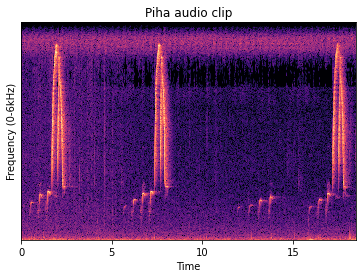

In [55]:
spect2 = spectrogram(piha2)
spect2

ValueError: only 1-dimensional arrays can be used

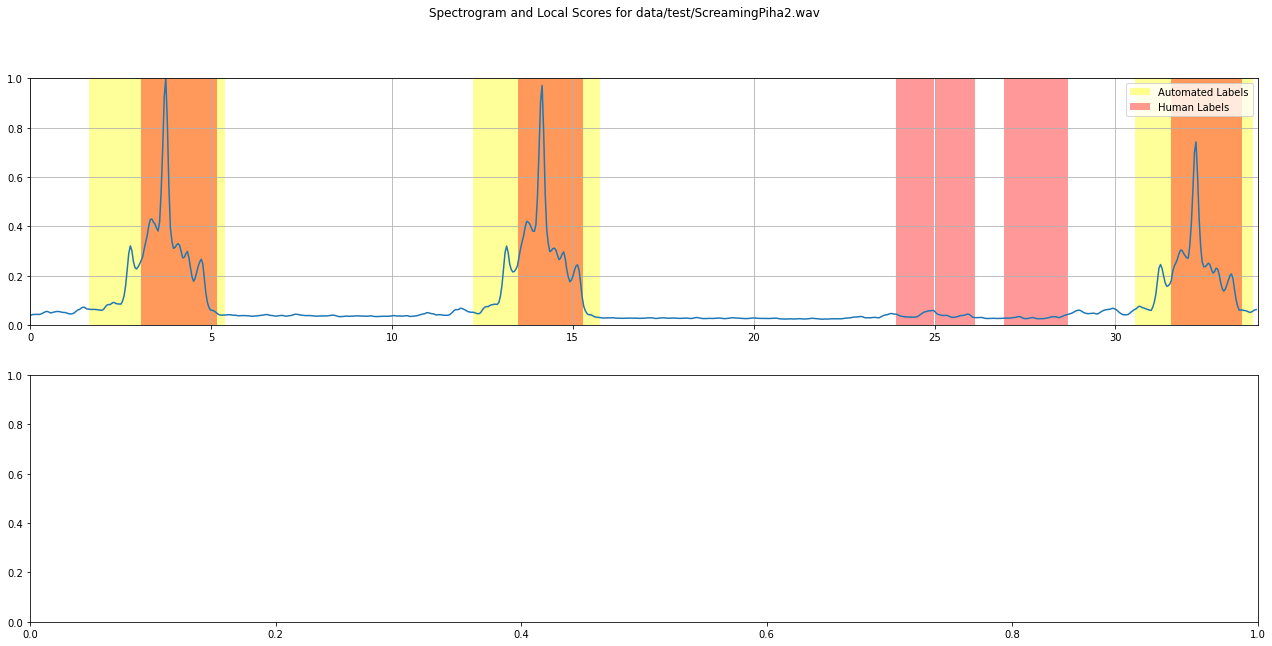

In [68]:
corr = correlation('ScreamingPiha2.wav', path2, spect2, temp, piha2)
corr

### Screaming 3

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE  OFFSET  DURATION  \
0  test_dir  test_file        0     6.844083        12000  2.7725    3.7625   

  MANUAL ID  
0      bird

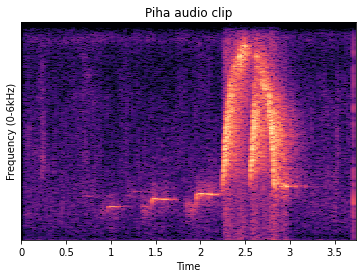

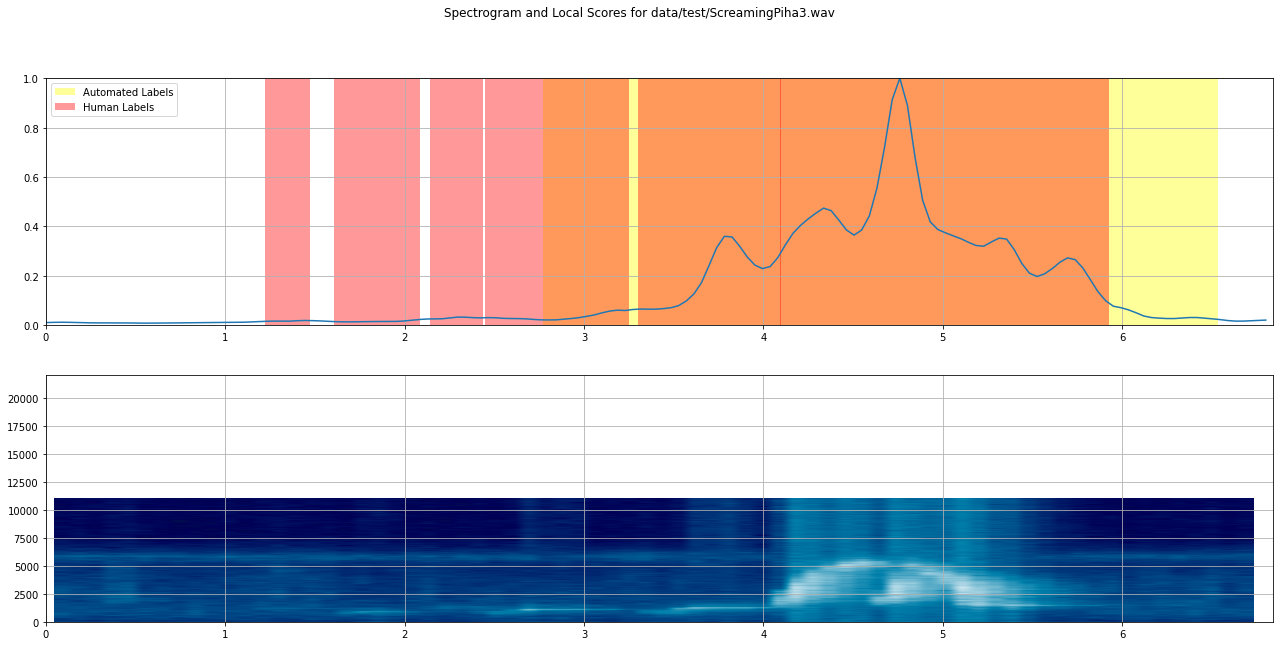

In [12]:
path3 = 'data/test/ScreamingPiha3.wav'
piha3 = load_audio(path3)
spect3 = spectrogram(piha3)

correlation('ScreamingPiha3.wav', path3, spect3, temp, piha3)

### Screaming 4

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE    OFFSET  DURATION  \
0  test_dir  test_file        0    13.557583        12000  0.607167  1.212917   
1  test_dir  test_file        0    13.557583        12000  3.502833  1.000000   
2  test_dir  test_file        0    13.557583        12000  9.421917  3.044000   

  MANUAL ID  
0      bird  
1      bird  
2      bird

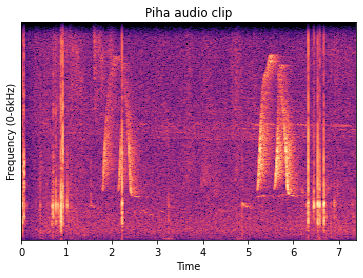

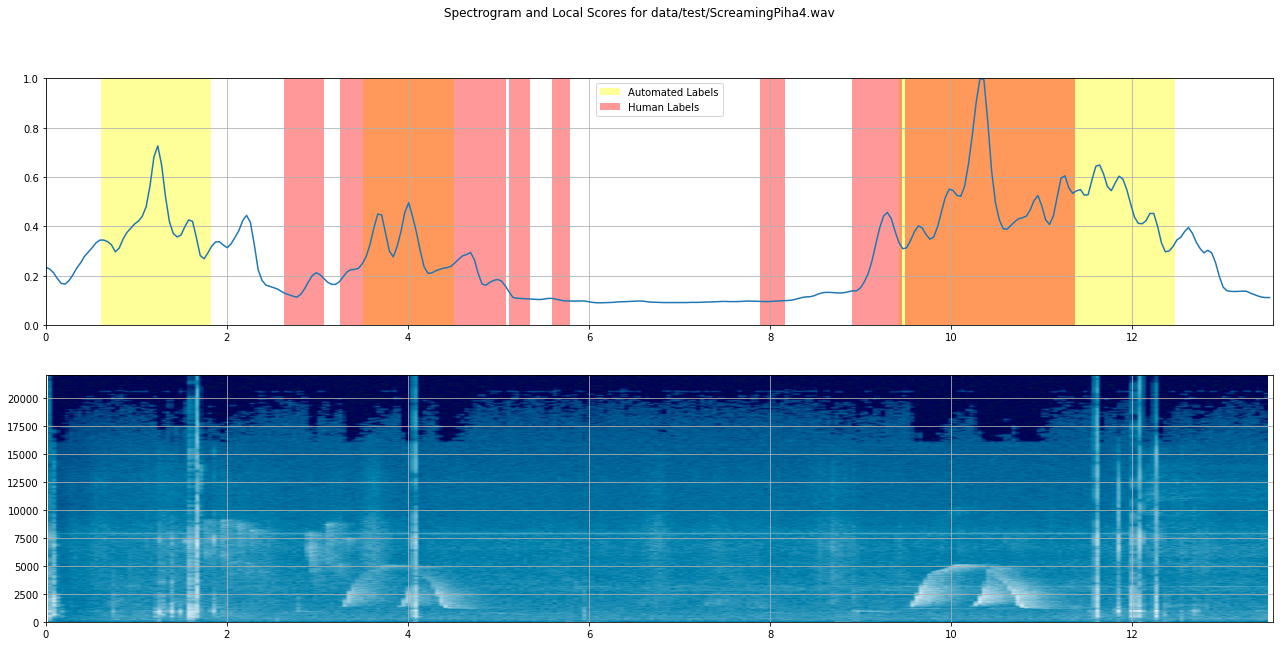

In [14]:
path4 = 'data/test/ScreamingPiha4.wav'
piha4 = load_audio(path4)
spect4 = spectrogram(piha4)

correlation('ScreamingPiha4.wav', path4, spect4, temp, piha4)

### Screaming 5

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0       54.178        12000   2.693750   
1  test_dir  test_file        0       54.178        12000   7.250167   
2  test_dir  test_file        0       54.178        12000  16.022333   
3  test_dir  test_file        0       54.178        12000  23.091167   
4  test_dir  test_file        0       54.178        12000  30.074833   
5  test_dir  test_file        0       54.178        12000  34.460917   
6  test_dir  test_file        0       54.178        12000  41.614917   
7  test_dir  test_file        0       54.178        12000  49.194750   

   DURATION MANUAL ID  
0  1.127750      bird  
1  4.108583      bird  
2  3.853083      bird  
3  1.212917      bird  
4  3.640167      bird  
5  1.170333      bird  
6  1.681333      bird  
7  3.640167      bird

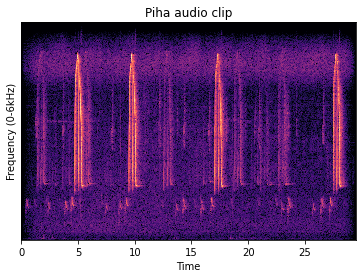

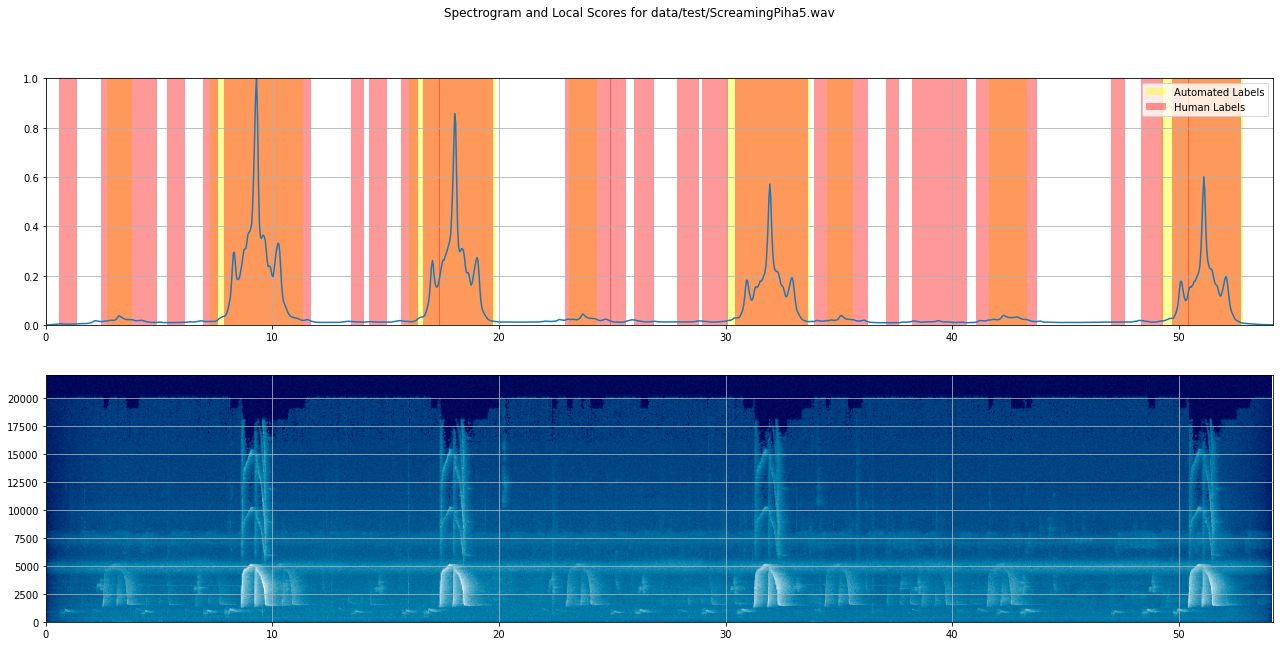

In [20]:
path5 = 'data/test/ScreamingPiha5.wav'
piha5 = load_audio(path5)
spect5 = spectrogram(piha5)

correlation('ScreamingPiha5.wav', path5, spect5, temp, piha5)

### Screaming 6

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0    70.635167        12000   1.033000   
1  test_dir  test_file        0    70.635167        12000   4.822917   
2  test_dir  test_file        0    70.635167        12000   9.166417   
3  test_dir  test_file        0    70.635167        12000  22.239500   
4  test_dir  test_file        0    70.635167        12000  30.926500   
5  test_dir  test_file        0    70.635167        12000  43.658917   
6  test_dir  test_file        0    70.635167        12000  46.682333   
7  test_dir  test_file        0    70.635167        12000  59.244417   
8  test_dir  test_file        0    70.635167        12000  65.120917   
9  test_dir  test_file        0    70.635167        12000  67.590750   

   DURATION MANUAL ID  
0  2.490417      bird  
1  2.703333      bird  
2  2.405250      bird  
3  2.447833      bird  
4  2.022000      bird  
5  1.596167      bird  
6  2.958833      bird  
7  1.596167      bird  
8  1.383250      bird  
9  1.085167      bird

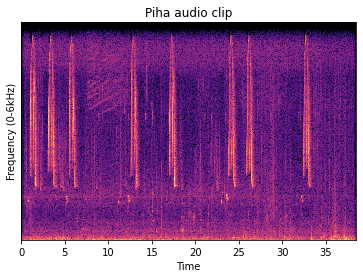

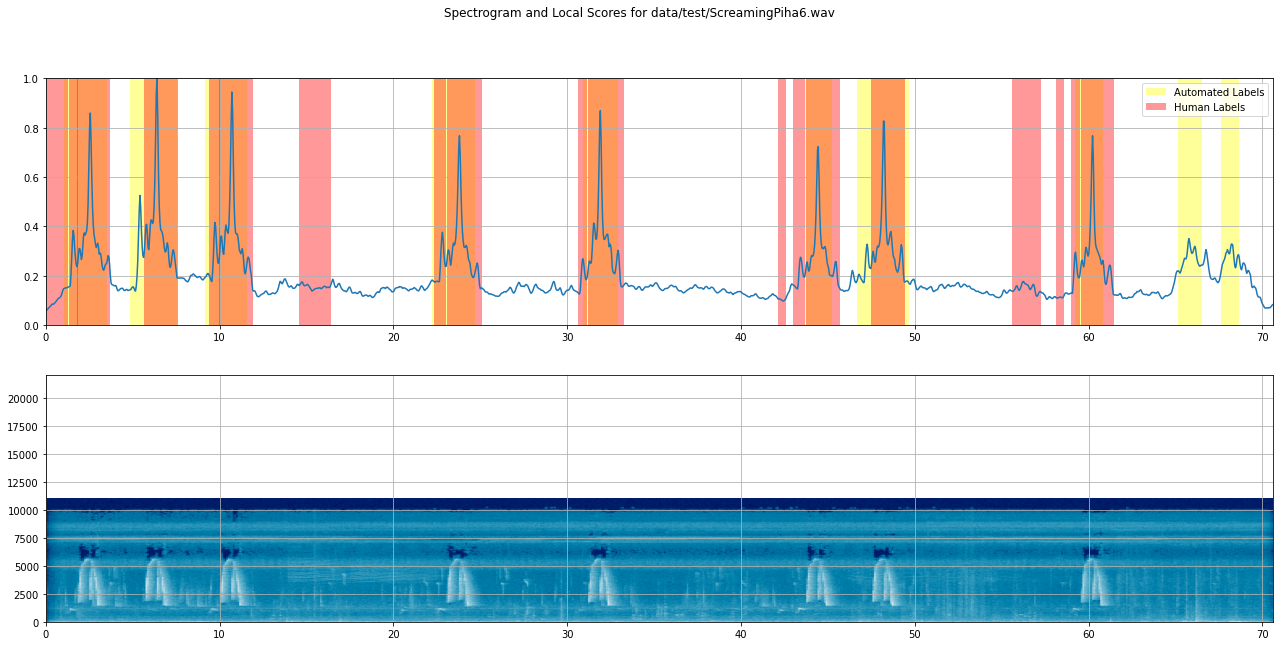

In [21]:
path6 = 'data/test/ScreamingPiha6.wav'
piha6 = load_audio(path6)
spect6 = spectrogram(piha6)

correlation('ScreamingPiha6.wav', path6, spect6, temp, piha6)

### Screaming 7

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE      OFFSET  \
0   test_dir  test_file        0    133.59025        12000    7.676000   
1   test_dir  test_file        0    133.59025        12000   19.343833   
2   test_dir  test_file        0    133.59025        12000   30.926500   
3   test_dir  test_file        0    133.59025        12000   46.895250   
4   test_dir  test_file        0    133.59025        12000   56.987500   
5   test_dir  test_file        0    133.59025        12000   64.354417   
6   test_dir  test_file        0    133.59025        12000   69.634750   
7   test_dir  test_file        0    133.59025        12000   77.172000   
8   test_dir  test_file        0    133.59025        12000   82.920750   
9   test_dir  test_file        0    133.59025        12000   92.502000   
10  test_dir  test_file        0    133.59025        12000  103.062667   
11  test_dir  test_file        0    133.59025        12000  112.942000   

    DURATION MANUAL ID  
0   1.212917      bird  
1   2.703333      bird  
2   1.511000      bird  
3   2.405250      bird  
4   5.343500      bird  
5   3.044000      bird  
6   1.425833      bird  
7   2.703333      bird  
8   1.000000      bird  
9   3.256917      bird  
10  3.001417      bird  
11  2.149750      bird

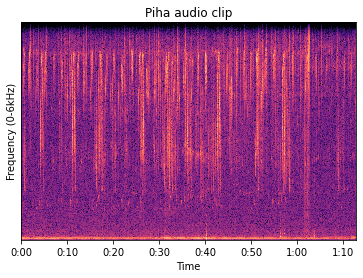

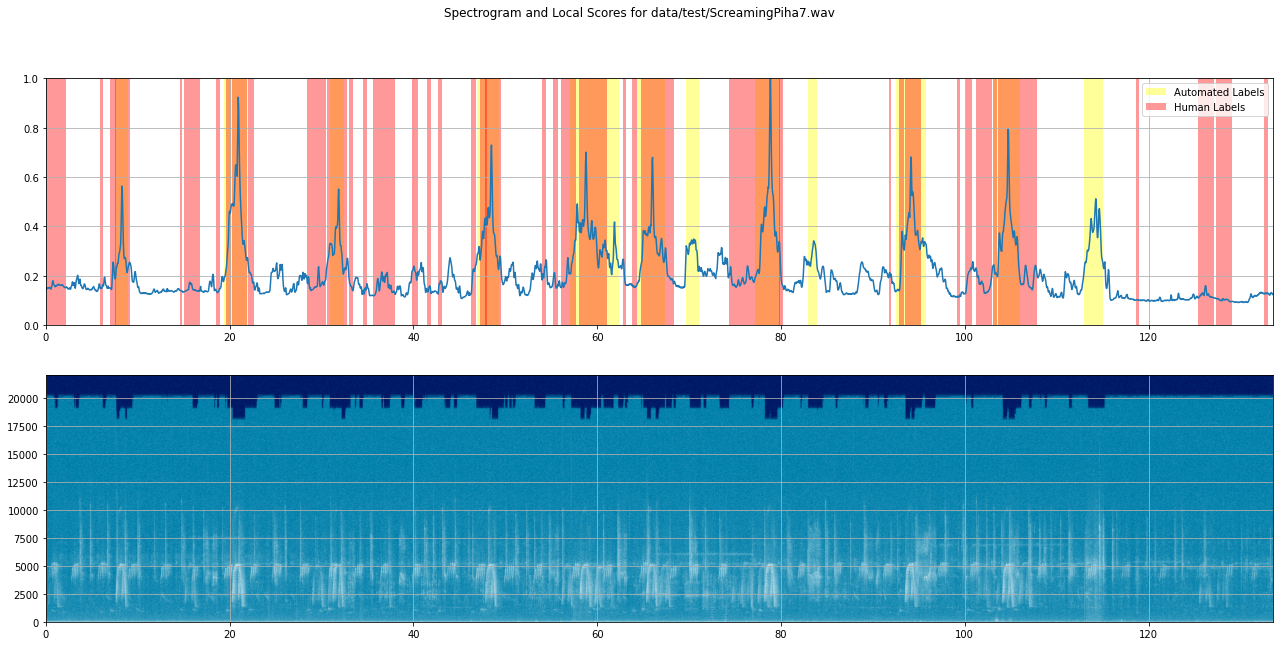

In [22]:
path7 = 'data/test/ScreamingPiha7.wav'
piha7 = load_audio(path7)
spect7 = spectrogram(piha7)

correlation('ScreamingPiha7.wav', path7, spect7, temp, piha7)

### Screaming 8

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0    44.120833        12000   3.843500   
1  test_dir  test_file        0    44.120833        12000  18.449583   
2  test_dir  test_file        0    44.120833        12000  35.355167   

   DURATION MANUAL ID  
0  1.681333      bird  
1  2.660750      bird  
2  2.447833      bird

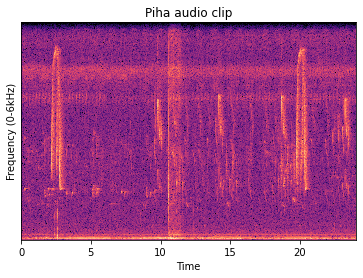

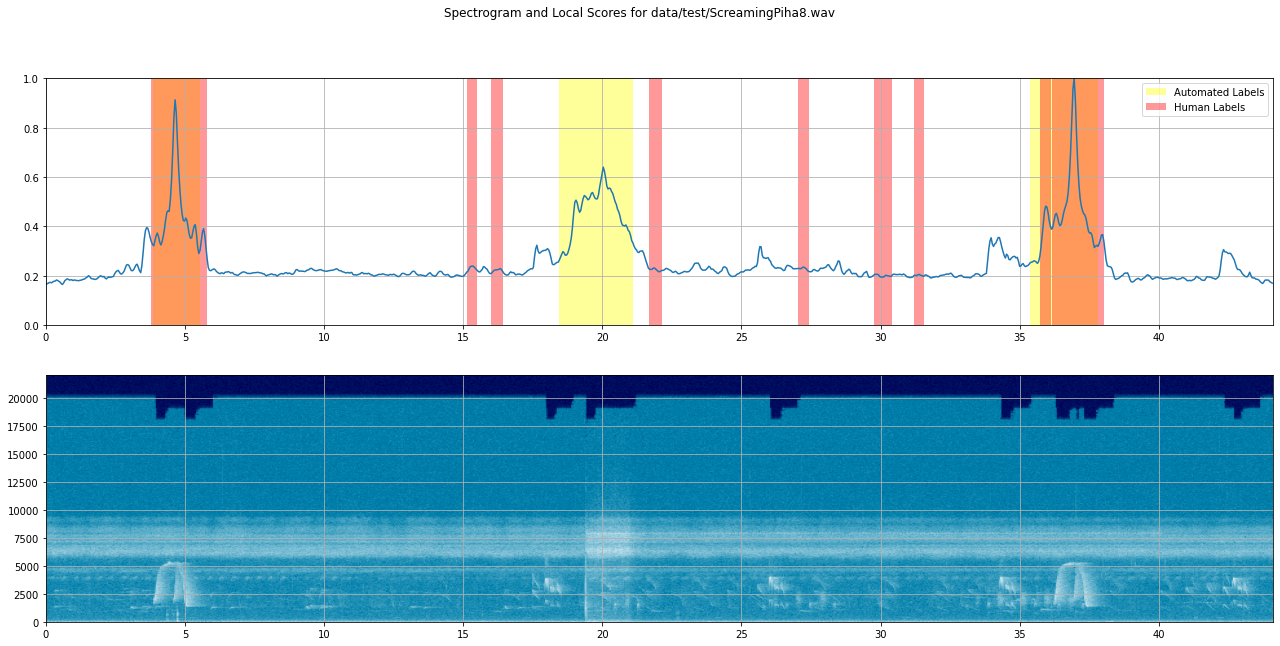

In [23]:
path8 = 'data/test/ScreamingPiha8.wav'
piha8 = load_audio(path8)
spect8 = spectrogram(piha8)

correlation('ScreamingPiha8.wav', path8, spect8, temp, piha8)

### Screaming 9

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0    37.302917        12000   3.928667   
1  test_dir  test_file        0    37.302917        12000   8.655417   
2  test_dir  test_file        0    37.302917        12000  17.044333   
3  test_dir  test_file        0    37.302917        12000  23.517000   
4  test_dir  test_file        0    37.302917        12000  31.948500   

   DURATION MANUAL ID  
0  3.555000      bird  
1  3.725333      bird  
2  3.469833      bird  
3  3.427250      bird  
4  3.469833      bird

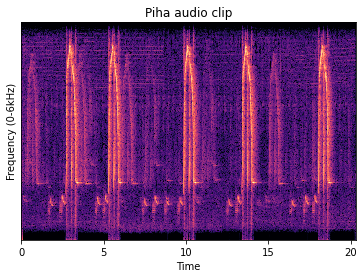

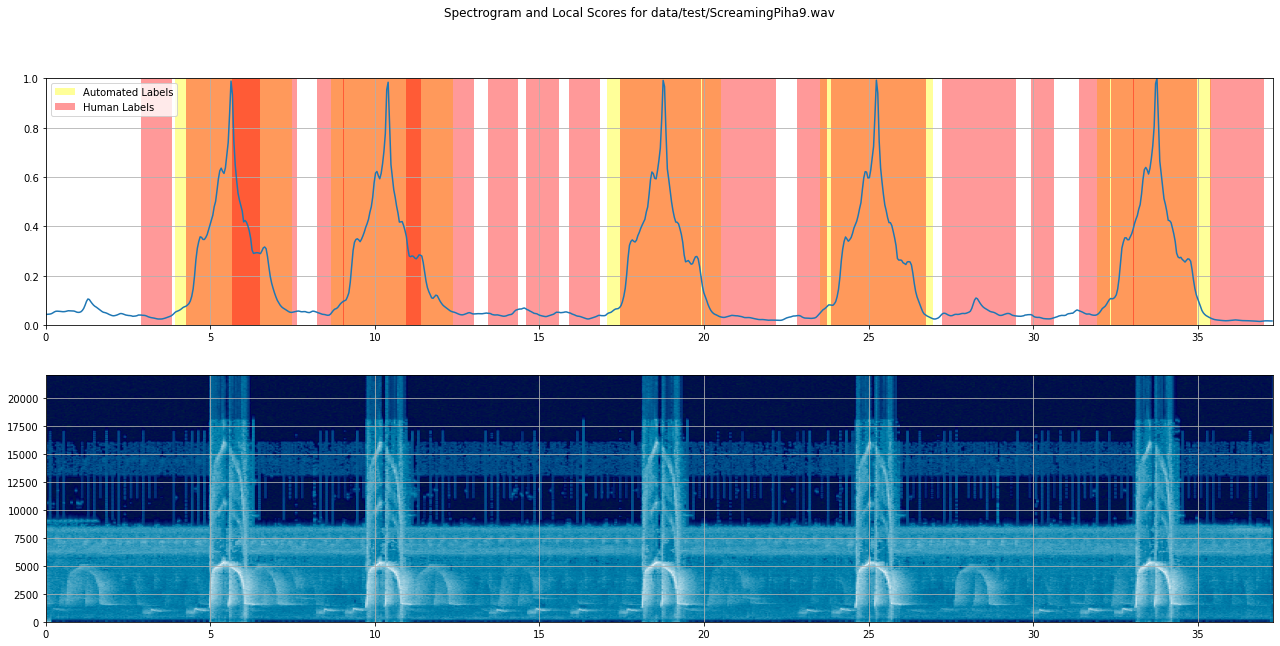

In [24]:
path9 = 'data/test/ScreamingPiha9.wav'
piha9 = load_audio(path9)
spect9 = spectrogram(piha9)

correlation('ScreamingPiha9.wav', path9, spect9, temp, piha9)

### Screaming 10

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0    89.782917        12000   1.033000   
1  test_dir  test_file        0    89.782917        12000   8.655417   
2  test_dir  test_file        0    89.782917        12000  19.769667   
3  test_dir  test_file        0    89.782917        12000  28.925083   
4  test_dir  test_file        0    89.782917        12000  38.761833   
5  test_dir  test_file        0    89.782917        12000  47.321083   
6  test_dir  test_file        0    89.782917        12000  57.626250   
7  test_dir  test_file        0    89.782917        12000  71.380667   
8  test_dir  test_file        0    89.782917        12000  75.937083   

    DURATION MANUAL ID  
0   3.895667      bird  
1   3.895667      bird  
2   3.469833      bird  
3   3.725333      bird  
4   3.469833      bird  
5   3.469833      bird  
6   3.725333      bird  
7   3.810500      bird  
8  13.845833      bird

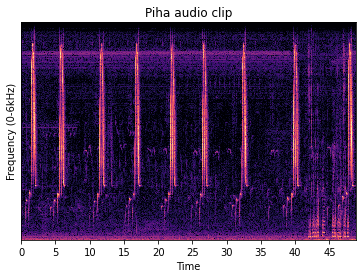

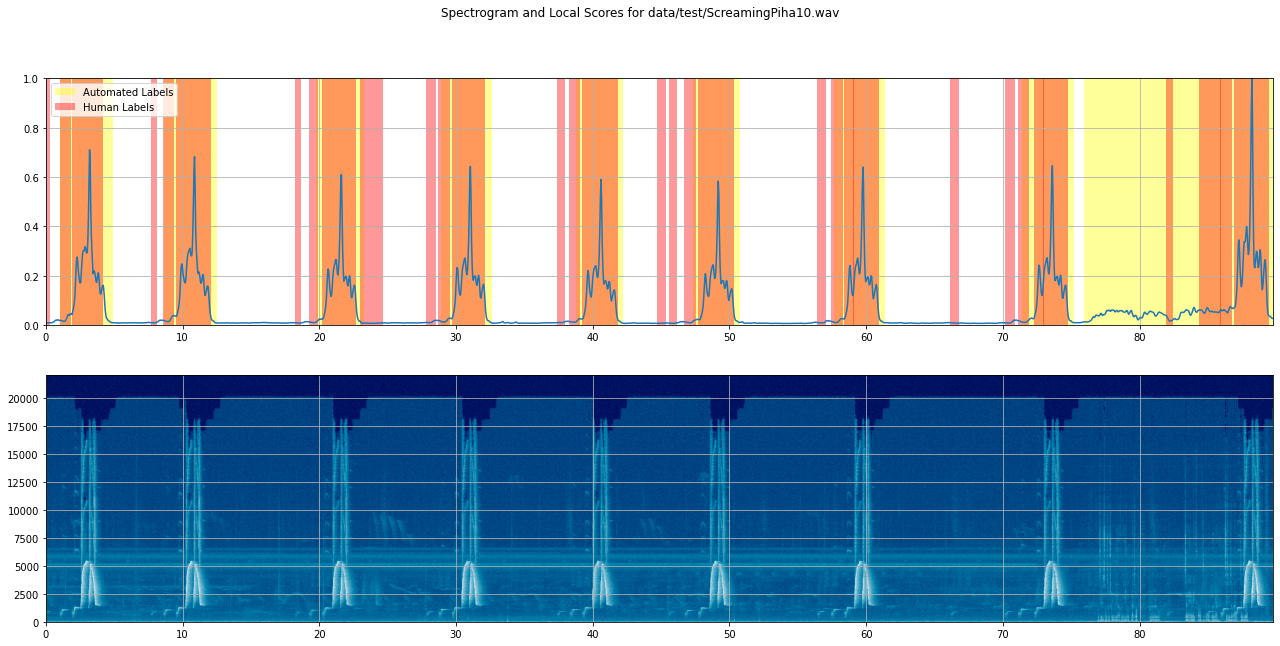

In [25]:
path10 = 'data/test/ScreamingPiha10.wav'
piha10 = load_audio(path10)
spect10 = spectrogram(piha10)

correlation('ScreamingPiha10.wav', path10, spect10, temp, piha10)

### Screaming 11

FOLDER    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE     OFFSET  \
0  test_dir  test_file        0    63.895583        12000   3.545417   
1  test_dir  test_file        0    63.895583        12000  13.680250   
2  test_dir  test_file        0    63.895583        12000  20.834250   
3  test_dir  test_file        0    63.895583        12000  29.691583   
4  test_dir  test_file        0    63.895583        12000  34.588667   
5  test_dir  test_file        0    63.895583        12000  38.037917   
6  test_dir  test_file        0    63.895583        12000  46.001000   
7  test_dir  test_file        0    63.895583        12000  56.221000   
8  test_dir  test_file        0    63.895583        12000  61.416167   

   DURATION MANUAL ID  
0  4.406667      bird  
1  3.299500      bird  
2  3.725333      bird  
3  3.299500      bird  
4  2.064583      bird  
5  3.725333      bird  
6  3.767917      bird  
7  3.342083      bird  
8  1.042583      bird

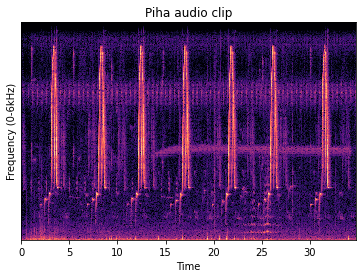

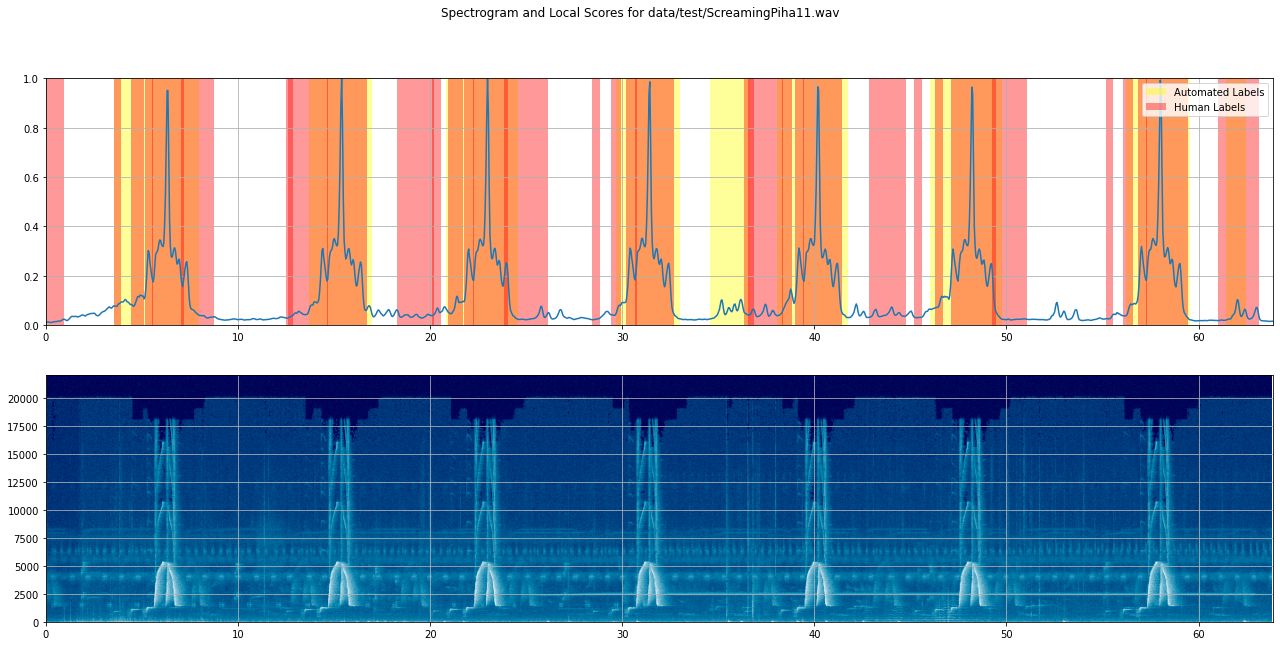

In [26]:
path11 = 'data/test/ScreamingPiha11.wav'
piha11 = load_audio(path11)
spect11 = spectrogram(piha11)

correlation('ScreamingPiha11.wav', path11, spect11, temp, piha11)